News Titles Classification: Haaretz vs Israel Hayom
=============================================================

*** Developing a classifier to distinguish between headlines from Haaretz and Israel Hayom newspapers, showcasing both algorithmic approach and coding ability***

**Author:** *Oran Danon*

**Full Task Description:** Develop a classifier to separate headlines of Haaretz and Israel Hayom. You can use whatever algorithm(s) you like. Our goal will be both to see your way of approaching the solution algorithmically, and your coding ability.
Please add comments to the code to share with us your thinking progress. We are mainly interested in being impressed by your way of thinking and less by the final result.

**Important technical note**: I have rerun all code in this notebook to ensure reproducibility. Small variations may exist between documented results and current outputs from this verification process.

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime

import numpy as np
import pandas as pd
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Collecting the data
* Israel HaYom: I noticed that one can scrape by date, e.g., https://www.israelhayom.com/2024/11/26/, the code to create israel_hayom.csv is attached below
* Haaretz: I saw there is an RSS version https://www.haaretz.co.il/srv/htz---all-articles, so I look on waybackmachine, and aggregated manually all 08/22 article into one big file name `haaretz_all.xml` and use python to extract relevant information: Date, Author, Title.

## Israel HaYom Scrapper
- Implementation of web scraping using requests and BeautifulSoup
- Extraction of title, date, and author information
- Handling of pagination and error case

In [6]:
# url = 'https://www.israelhayom.com/2024/11/25/'

# cookies = {
#     'rbzid': 'oW+BYFragVdV1xGev9rweH2LrPRI+oUDvfqNvqweY7XjRnbizdl0qZLZ90yRmcyXtVY17wrurmKIJL5I/a7F7ksMFco6fv6nWVzBIo2BORD4OYxHDDJ3EB2NFmN485bIMx/CT6pBzr3sG13su27aKPAdGGgCXiRxpGsmed1rQEKXyZheHlcagbhqfa4xZ96f'
# }

# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:132.0) Gecko/20100101 Firefox/132.0',
#     'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
#     'Accept-Language': 'en-US,en;q=0.5',
#     'Accept-Encoding': 'gzip, deflate, br, zstd',
#     'Connection': 'keep-alive',
#     'Upgrade-Insecure-Requests': '1',
#     'Sec-Fetch-Dest': 'document',
#     'Sec-Fetch-Mode': 'navigate',
#     'Sec-Fetch-Site': 'none',
#     'Sec-Fetch-User': '?1'
# }


# def get_israel_hayom_articles_by_date(date):
#     urls = date_to_url(date)
#     articles_data = []
#     for url in urls:
#         response = requests.get(url, cookies=cookies, headers=headers)
#         soup = BeautifulSoup(response.text, 'html.parser')
#         articles = soup.find_all("article", {'class': 'jeg_post'})
#         for article in articles:
#             # Extract title
#             title_elem = article.find("h3", {'class': 'jeg_post_title'})
#             title = title_elem.find('a').text if title_elem else ''

#             # Extract author
#             author_elem = article.find("div", {'class': 'jeg_meta_author'})
#             author = author_elem.find('a').text if author_elem else ''

#             articles_data.append({
#                 'Title': title.strip(),
#                 'Date': date.strftime('%Y-%m-%d'),
#                 'Author': author.strip()
#             })

#     return articles_data


# def date_to_url(date):
#     str = "https://www.israelhayom.com/" + date.strftime("%Y/%m/%d/")
#     return [str, str + '/page/2/', str + '/page/3/']


# def get_israel_hayom_articles_range():
#     date = datetime(2022, 8, 30)
#     dates = [date - timedelta(days=i) for i in trange(31)]
#     articles_data = []

#     for date in tqdm(dates, desc="Scraping articles"):
#         articles_data.extend(get_israel_hayom_articles_by_date(date))

#     # Create DataFrame with Title as index
#     df = pd.DataFrame(articles_data).set_index('Title')
#     return df.loc[~df.index.duplicated(keep='first')]


# # Get the data and save to CSV
# israel_hayom_df = get_israel_hayom_articles_range()
# israel_hayom_df.to_csv('israel_hayom.csv')
# print(f"Total articles: {len(israel_hayom_df)}")
# # print("\nSample of the data:")
# # print(israel_hayom_df.head())

## Haaretz Data Processing
- XML parsing and data extraction
- Date formatting and standardization
- Author information

In [7]:
# import xml.etree.ElementTree as ET
# from datetime import datetime, timedelta

# with open('./data/haaretz_all.xml', 'r', encoding='utf-8') as file:
#     xml_content = file.read()

# # Parse XML
# root = ET.fromstring(xml_content)
# namespaces = {
#     'dc': 'http://purl.org/dc/elements/1.1/'
# }

# # Extract titles
# items = []
# for item in root.findall('.//item'):
#     date_str = item.find('pubDate').text if item.find('pubDate') is not None else ''
#     parsed_date = datetime.strptime(date_str, '%a, %d %b %Y %H:%M:%S %z')
#     formatted_date = parsed_date.strftime('%Y-%m-%d')
#     items.append({
#         'Title': item.find('title').text if item.find('title') is not None else '',
#         'Date': formatted_date,
#         'Author': item.find('dc:creator', namespaces).text if item.find('dc:creator', namespaces) is not None else ''
#     })

# # Create DataFrame
# df = pd.DataFrame(items)
# df.set_index('Title', inplace=True)
# # in case of duplicates, keeps the first occurrence
# df = df[~df.index.duplicated(keep='first')]
# df.to_csv('haaretz.csv')

## Dataset Creation
- Combining data from both sources: `haaretz.csv` and `israel_hayom.csv`
- Data cleaning and deduplication

In [2]:
israel_hayom_df = pd.read_csv('israel_hayom.csv')
haaretz_df = pd.read_csv('haaretz.csv')

# Add source label column
israel_hayom_df['is_israel_hayom'] = 1
haaretz_df['is_israel_hayom'] = 0

# Combine the dataframes
combined_df = pd.concat([israel_hayom_df, haaretz_df])

# Remove any duplicates if needed based on Title
combined_df = combined_df[~combined_df['Title'].duplicated(keep='first')]

# Save to new CSV
combined_df.to_csv('combined_news.csv', index=False)

print(f"Total articles: {len(combined_df)}")
print("\nSample distribution:")
print(combined_df['is_israel_hayom'].value_counts())
print("\nSample of the data:")
combined_df.head()

Total articles: 1760

Sample distribution:
is_israel_hayom
0    933
1    827
Name: count, dtype: int64

Sample of the data:


,Title,Date,Author,is_israel_hayom
0,Time to find the missing from the Karabakh war,2022-10-30,Ziya Guliyev,1
1,Generally lost: How the great promise of the 2...,2022-10-30,Mati Tuchfeld,1
2,Herzog condemns targeting of Pelosi home after...,2022-10-30,JNS and ILH Staff,1
3,Will US-Russia policy give Iran the bomb and k...,2022-10-30,Mitchell Bard,1
4,Grief and shock in S. Korea as 151 die in Hall...,2022-10-30,AP and ILH Staff,1


## Exploratory Data Analysis

### Dataset Overview

In [9]:
!pip install wordcloud

In [3]:
import re
import nltk
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

Total articles: 1760

Articles per source:
is_israel_hayom
0    933
1    827
Name: count, dtype: int64


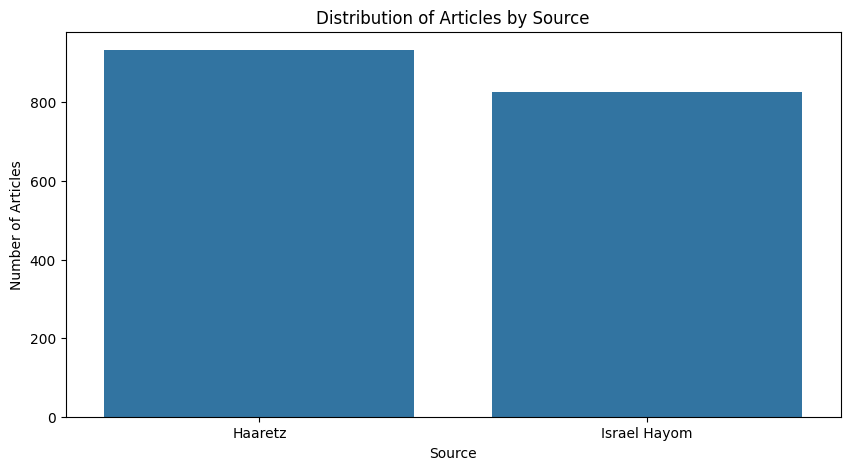

In [11]:
# Display basic dataset statistics
print("Total articles:", len(combined_df))
print("\nArticles per source:")
print(combined_df['is_israel_hayom'].value_counts())

# Create visualization of dataset distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=combined_df, x='is_israel_hayom')
plt.title('Distribution of Articles by Source')
plt.xticks([0, 1], ['Haaretz', 'Israel Hayom'])
plt.xlabel('Source')
plt.ylabel('Number of Articles')
plt.show()

### Temporal Distribution


<Figure size 1200x600 with 0 Axes>

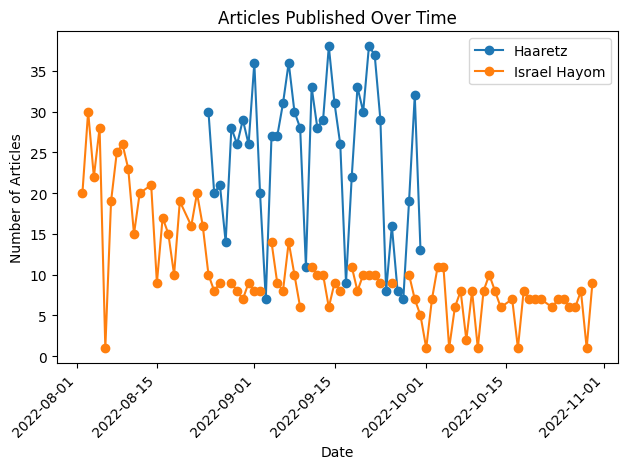

In [12]:
# Convert date column to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Plot articles over time
plt.figure(figsize=(12, 6))
combined_df.groupby(['Date', 'is_israel_hayom']).size().unstack().plot(kind='line', marker='o')
plt.title('Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(['Haaretz', 'Israel Hayom'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Data Filtering and Processing

- **Date Range Filter**
The dataset is filtered to include articles from 2022-08-19 to 2022-10-05, ensuring focus on newspapers' writing style differences rather than temporal patterns.
- **Class Balance**
Dataset maintains natural distribution between sources (Israel HaYom and Haaretz), preserving real-world representation rather than enforcing artificial balance.

Implementation Notes
- Class balancing code commented out
- Filtered dataframe assigned to working variables

In [13]:
# Filter date range
# real_overlap = (combined_df['Date'] >= '2022-08-24') & (combined_df['Date'] <= '2022-09-30')
mask = (combined_df['Date'] >= '2022-08-19') & (combined_df['Date'] <= '2022-10-05')
filtered_df = combined_df[mask]

# Get minimum count per date between sources
# counts = filtered_df.groupby(['Date', 'is_israel_hayom']).size().unstack().fillna(0)
# min_counts = counts.min(axis=1).astype(int)

# Create balanced dataset
# ratio = 1
# balanced_dfs = []
# for date in min_counts.index:
#    min_count = min_counts[date] * ratio
#    if min_count > 0:
#        date_df = filtered_df[filtered_df['Date'] == date]
#        balanced_dfs.append(date_df[date_df['is_israel_hayom'] == 0].head(min_count))
#        balanced_dfs.append(date_df[date_df['is_israel_hayom'] == 1].head(min_count))

# balanced_df = pd.concat(balanced_dfs)
# print(f"Original: {len(filtered_df)}, Balanced: {len(balanced_df)}")
# print("\nArticles per source:", balanced_df['is_israel_hayom'].value_counts())

df = combined_df = filtered_df

<Figure size 1200x600 with 0 Axes>

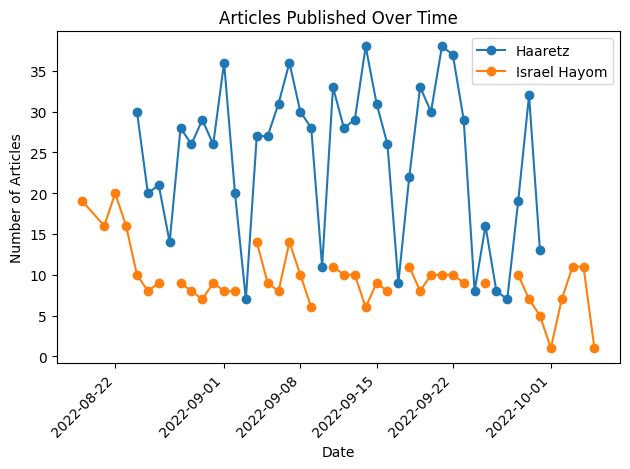

In [14]:
# Convert date column to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Plot articles over time
plt.figure(figsize=(12, 6))
combined_df.groupby(['Date', 'is_israel_hayom']).size().unstack().plot(kind='line', marker='o')
plt.title('Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(['Haaretz', 'Israel Hayom'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Wordcloud and common words by newspaper

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


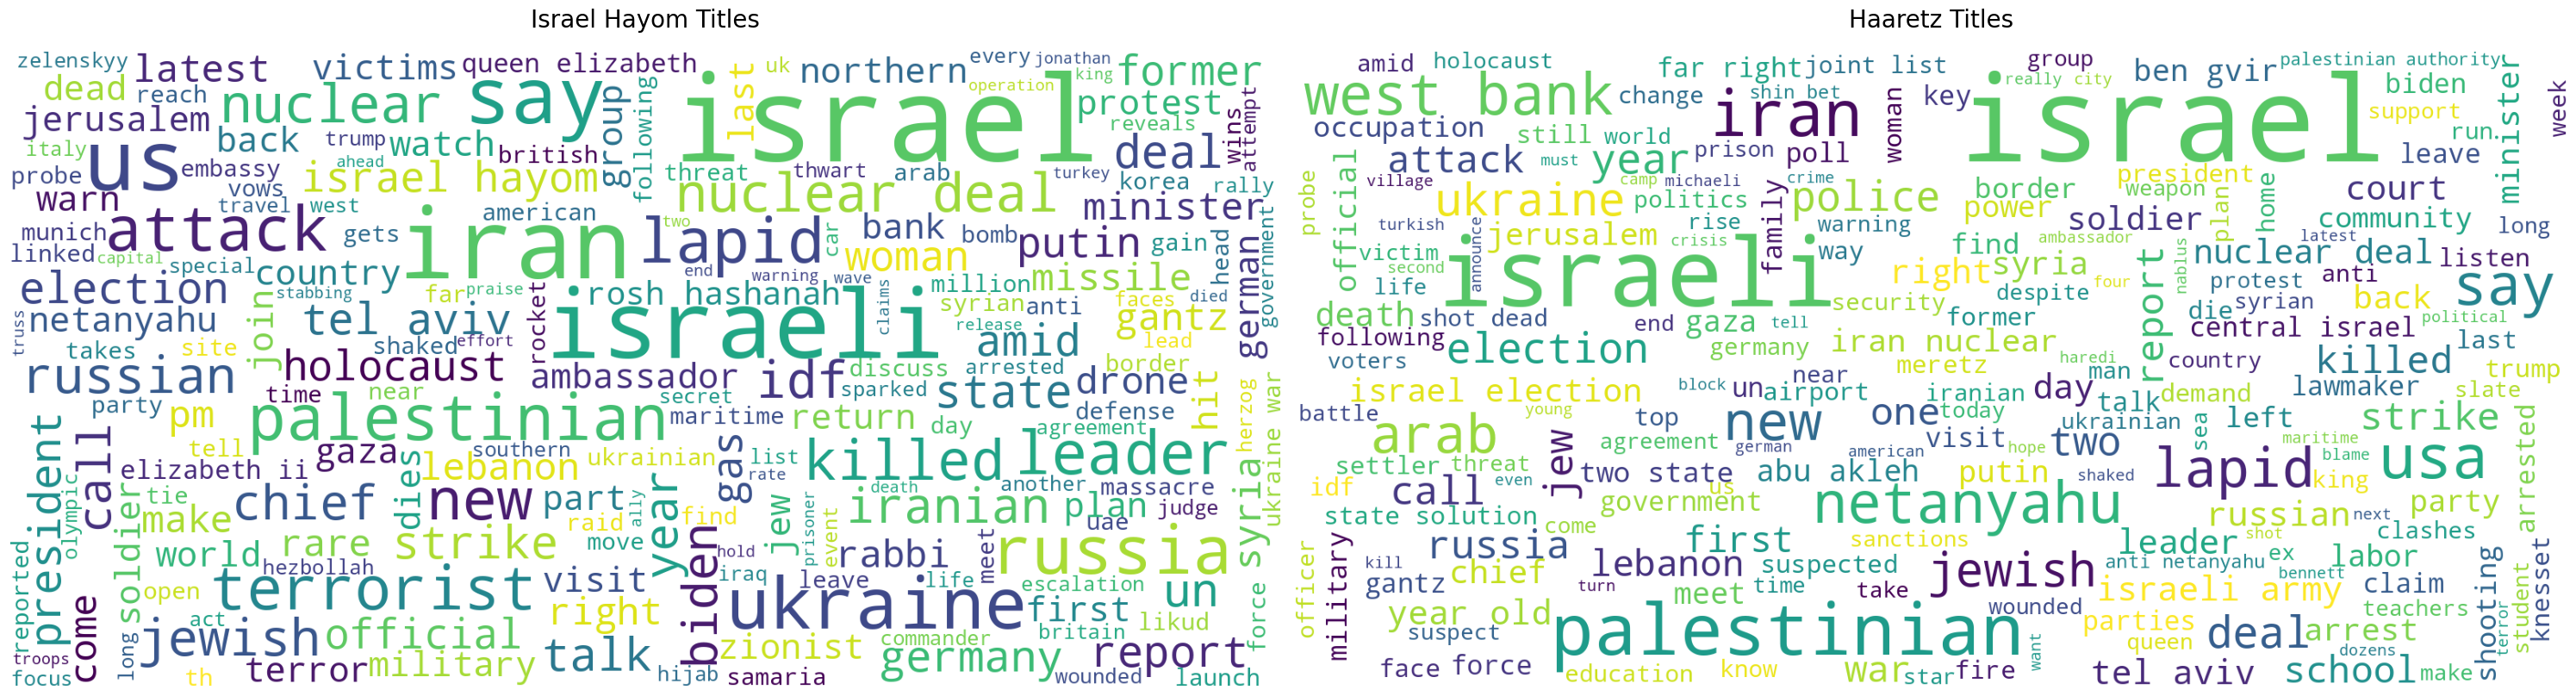

,Israel Hayom,Haaretz
israel,72,275
israeli,34,146
iran,42,71
palestinian,12,61
deal,21,42
netanyahu,5,58
lapid,16,47
nuclear,24,33
says,23,34
bank,4,51


In [15]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean(text):
    # Replace common abbreviations
    text = text.replace('U.S.', 'USA')
    text = text.replace('U.N.', 'UN')

    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    # Remove stopwords and single letters
    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) > 1]
    return ' '.join(words)

def get_source_text(df, is_israel_hayom):
    source_df = df[df['is_israel_hayom'] == is_israel_hayom]
    return clean(' '.join(source_df['Title'].astype(str)))

def create_wordclouds(israel_text, haaretz_text):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

    wordcloud_params = dict(
        width=1600, height=800,
        background_color='white',
        min_font_size=10, max_font_size=150,
        random_state=42
    )

    israel_cloud = WordCloud(**wordcloud_params).generate(israel_text)
    haaretz_cloud = WordCloud(**wordcloud_params).generate(haaretz_text)

    ax1.imshow(israel_cloud)
    ax1.axis('off')
    ax1.set_title('Israel Hayom Titles', fontsize=20, pad=20)

    ax2.imshow(haaretz_cloud)
    ax2.axis('off')
    ax2.set_title('Haaretz Titles', fontsize=20, pad=20)

    plt.tight_layout()
    plt.show()

    return Counter(israel_text.split()), Counter(haaretz_text.split())

def analyze_frequencies(israel_freq, haaretz_freq, n_words=20):
    comparison = pd.DataFrame({
        'Israel Hayom': pd.Series(israel_freq),
        'Haaretz': pd.Series(haaretz_freq)
    }).fillna(0)

    return (comparison.assign(Total=lambda x: x.sum(axis=1))
            .sort_values('Total', ascending=False)
            .drop('Total', axis=1)
            .head(n_words)
            .style.background_gradient(cmap='Blues')
            .format('{:.0f}')
            .set_caption('Top Word Frequencies by Source'))

def main(df, n_words=20):
    israel_text = get_source_text(df, 1)
    haaretz_text = get_source_text(df, 0)
    israel_freq, haaretz_freq = create_wordclouds(israel_text, haaretz_text)
    return analyze_frequencies(israel_freq, haaretz_freq, n_words)

# Usage
frequencies = main(df)
display(frequencies)

### Author Analysis


<Figure size 1200x600 with 0 Axes>

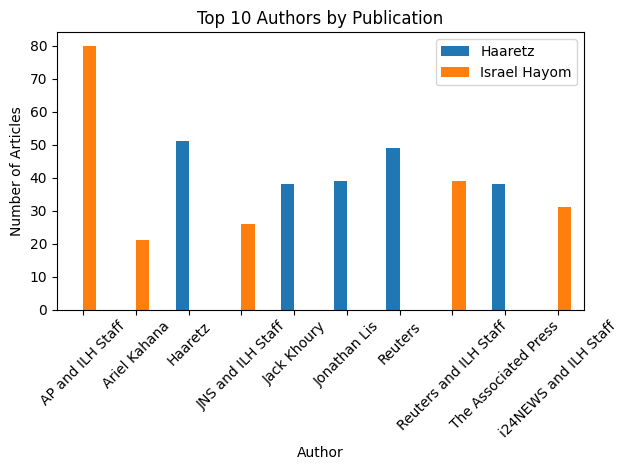

In [16]:
# Author distribution per source
plt.figure(figsize=(12, 6))
author_counts = pd.DataFrame({
    'Haaretz': combined_df[combined_df['is_israel_hayom']==0]['Author'].value_counts().head(5),
    'Israel Hayom': combined_df[combined_df['is_israel_hayom']==1]['Author'].value_counts().head(5)
})
author_counts.plot(kind='bar')
plt.title('Top 10 Authors by Publication')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Classifications

In [17]:
from sklearn.model_selection import train_test_split

df = combined_df
# Split into training and test sets
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['is_israel_hayom']
)

# Approach 1: Author-Based Classification
- Rationale: Authors typically write exclusively for one publication
- Pros: high performance results
- Cons: Memorization is a **shallow type of learning**


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

def display_metrics(y_true, y_pred, dataset_name="Test"):
    """
    Display confusion matrix and key metrics

    Args:
        y_true: True labels
        y_pred: Predicted labels
        dataset_name: Name of the dataset for display purposes
    """
    # Create confusion matrix display
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=["Haaretz", "Israel Hayom"],
        cmap=plt.cm.Blues
    )

    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    # Add title with metrics
    disp.ax_.set_title(f"Confusion Matrix on {dataset_name} \n" +
                      f"Accuracy: {accuracy:.2f}, F1: {f1:.2f}\n" +
                      f"Precision: {precision:.2f}, Recall: {recall:.2f}")

    # Add value annotations to the confusion matrix
    total = tn + fp + fn + tp
    for i in range(2):
        for j in range(2):
            value = disp.confusion_matrix[i, j]
            percentage = value / total * 100
            disp.text_[i, j].set_text(f'{value}\n({percentage:.1f}%)')

    plt.show()

    # Print detailed metrics
    print("\nDetailed Metrics:")
    print(f"True Negatives (Correctly identified Haaretz): {tn}")
    print(f"False Positives (Haaretz misclassified as Israel Hayom): {fp}")
    print(f"False Negatives (Israel Hayom misclassified as Haaretz): {fn}")
    print(f"True Positives (Correctly identified Israel Hayom): {tp}")
    print(f"\nAccuracy: {accuracy:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")

We implement a simple yet effective classification method based on author attribution. Our hypothesis is that authors typically write exclusively for one publication, making author names a strong predictor of the source newspaper.

The implementation follows these steps:
1. Extract a set of known Israel Hayom authors from the training data
2. For each article, classify it as Israel Hayom (1) if its author appears in our set of Israel Hayom authors, otherwise classify it as Haaretz (0)
3. Apply this classification rule to test set to evaluate performance

It is more appropriate to generate a true list of all the authors, and not do so by processing the data. However, we aim to show capabilities and not create a real-life application.


Test Set Metrics:


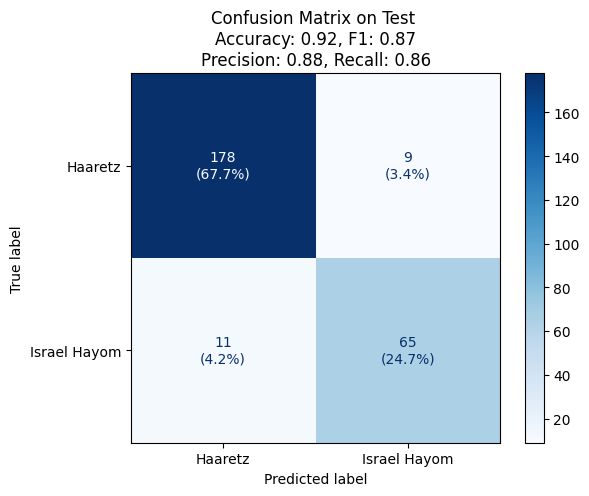


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 178
False Positives (Haaretz misclassified as Israel Hayom): 9
False Negatives (Israel Hayom misclassified as Haaretz): 11
True Positives (Correctly identified Israel Hayom): 65

Accuracy: 0.924
F1 Score: 0.867
Precision: 0.878
Recall: 0.855


In [19]:
# Keep raw training data (without the label)
raw_training_data = train_df[['Date', 'Author']]

# Create set of Israel Hayom authors from training data
israel_hayom_authors = set(train_df[train_df['is_israel_hayom'] == 1]['Author'])

# Prediction function
def predict_source(df):
    return np.array([1 if author in israel_hayom_authors else 0 for author in df['Author']])

# Make predictions
test_predictions = predict_source(test_df)

print("\nTest Set Metrics:")
display_metrics(test_df['is_israel_hayom'], test_predictions, "Test")

### Evaluation of Initial Results

During initial analysis of author attribution, we identified a significant data quality issue: many author names appeared in concatenated formats. For example:
```
"John Smith and Jane Doe"
"Reuters, AP and ILH Staff"
"David Cohen/Sarah Miller"
```

This concatenation caused our initial model to misclassify articles because it treated combined author strings as unique authors, rather than recognizing the individual contributors. For instance, "John Smith and Jane Doe" was treated as a completely different author from both "John Smith" and "Jane Doe" individually.


In [20]:
# Display cases where Israel Hayom articles were misclassified as Haaretz
false_negatives = test_df[
    (test_df['is_israel_hayom'] == 1) &
    (test_predictions == 0)
][['Title', 'Author']]

print("\nIsrael Hayom articles misclassified as Haaretz:")
print(israel_hayom_authors)


Israel Hayom articles misclassified as Haaretz:
{'Ariel Kahana and i24NEWS', 'Uri Dagon, AP and ILH Staff', 'AP, i24NEWS and ILH Staff', 'Tamir Morag, Ariel Kahana and Lilach Shoval', 'Noam Dvir', 'Ariel Kahana, Tamir Morag and JNS', 'Michel Makhoul', 'AP, Reuters and ILH Staff', 'Shachar Kleiman and Reuters', 'i24NEWS and ILH Staff', 'Dana Ben-Shimon, Reuters and ILH Staff', 'Yehuda Shlezinger and Yoav Limor', 'Yuval Rivlin', 'Shimon Yaish', 'Yori Yalon', 'Tamir Morag', 'Ayoob Kara', 'Lilach Shoval, Hanan Greenwood and Ilya Egorov', 'Omer Lachmanovitch', 'Ram Liran', 'Reuters', 'Tamir Morag and News Agencies', 'Yehuda Shlezinger', 'Judy Lash Balint/JNS', 'ILH Staff', 'Ariel Kahana, AP and ILH Staff', 'David Isaac/JNS', 'Neta Bar and AP', 'Hanan Greenwood and JNS', 'David Baron, Tamir Morag, Ariel Kahana and News Agencies', 'Ran Puni', 'David Wilson/Las Vegas Review-Journal', 'Ariel Kahana, Tamir Morag, Reuters and ILH Staff', 'Ariel Kahana and ILH Staff', 'Yoav Limor', 'Shachar Kleim

### Author Name Cleaning Process

To address this issue, we implemented a comprehensive author string cleaning function that:

1. Splits concatenated author names using common separators:
   - " and "
   - ", "
   - "/"
   - " & "

2. Removes common suffixes and prefixes:
   - News agency tags (e.g., "/JNS", " and News Agencies")
   - Wire service attributions (e.g., " and Reuters", " and AP")
   - Standard prefixes (e.g., "Reuters, ", "AP, ", "i24NEWS, ")

3. Handles special cases:
   - Removes generic sources while preserving specific attributions
   - Maintains ILH-related attributions as they are source-specific
   - Creates a set of unique author names to prevent duplicates

This cleaning process significantly improved our model's ability to correctly attribute articles to their respective publications. The improved author recognition led to better classification results, as shown in our updated metrics.

Example of the transformation:
```python
# Before cleaning:
"John Smith and Jane Doe/Reuters"

# After cleaning:
["John Smith", "Jane Doe"]
```

Future improvements could include:
- Name standardization (handling variations of the same name)
- More sophisticated entity recognition for author names


Test Set Metrics:


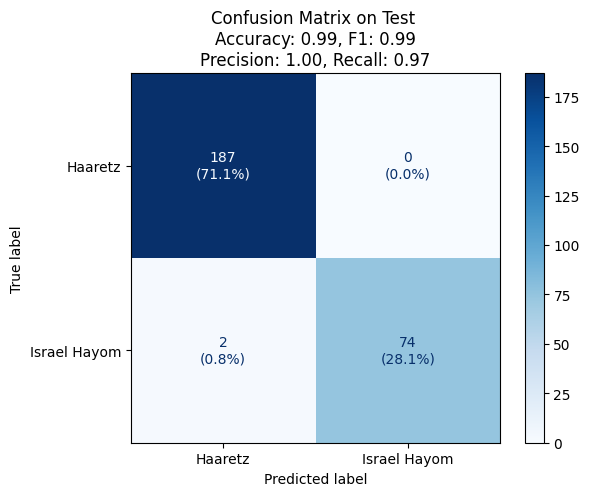


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 187
False Positives (Haaretz misclassified as Israel Hayom): 0
False Negatives (Israel Hayom misclassified as Haaretz): 2
True Positives (Correctly identified Israel Hayom): 74

Accuracy: 0.992
F1 Score: 0.987
Precision: 1.000
Recall: 0.974


In [21]:
def clean_author_string(author_string):
    """Clean a single author string."""
    # Initialize authors list
    authors = [author_string]

    # Split by common separators
    separators = [' and ', ', ', '/', ' & ']
    for separator in separators:
        new_authors = []
        for author in authors:
            new_authors.extend(author.split(separator))
        authors = new_authors

    # Clean up each author
    cleaned_authors = set()
    for author in authors:
        # Remove common suffixes and prefixes
        suffixes_to_remove = ['/JNS', ' and News Agencies', ' and Reuters', ' and AP', ' and i24NEWS']
        prefixes_to_remove = ['Reuters, ', 'AP, ', 'i24NEWS, ']

        cleaned_author = author.strip()

        # Remove suffixes
        for suffix in suffixes_to_remove:
            if cleaned_author.endswith(suffix):
                cleaned_author = cleaned_author[:-len(suffix)]

        # Remove prefixes
        for prefix in prefixes_to_remove:
            if cleaned_author.startswith(prefix):
                cleaned_author = cleaned_author[len(prefix):]

        # Skip generic sources (but keep ILH-related ones)
        skip_authors = {'News Agencies', 'Reuters', 'AP', 'i24NEWS', 'JNS'}

        if cleaned_author and cleaned_author not in skip_authors:
            cleaned_authors.add(cleaned_author.strip())

    return cleaned_authors

# Create set of Israel Hayom authors from training data (cleaned)
israel_hayom_authors = set()
for author in train_df[train_df['is_israel_hayom'] == 1]['Author']:
    israel_hayom_authors.update(clean_author_string(author))

# Prediction function using cleaned authors
def predict_source(df):
    predictions = []
    for author in df['Author']:
        # Clean the test author string
        cleaned_authors = clean_author_string(author)
        # If any of the cleaned authors appear in israel_hayom_authors, predict 1
        predictions.append(1 if any(auth in israel_hayom_authors for auth in cleaned_authors) else 0)
    return np.array(predictions)

# Make predictions
train_predictions = predict_source(train_df)
test_predictions = predict_source(test_df)

print("\nTest Set Metrics:")
display_metrics(test_df['is_israel_hayom'], test_predictions, "Test")

In [22]:
# Display cases where Israel Hayom articles were misclassified as Haaretz
false_negatives = test_df[
    (test_df['is_israel_hayom'] == 1) &
    (test_predictions == 0)
][['Title', 'Author']]

print("\nIsrael Hayom articles misclassified as Haaretz:")
print(israel_hayom_authors)


Israel Hayom articles misclassified as Haaretz:
{'Amnon Lord', 'Las Vegas Review-Journal', 'Alex Traiman', 'David Wilson', 'Judy Lash Balint', 'Rachel Avraham', 'David Isaac', 'Jonathan S. Tobin', 'ILH Staff', 'David Baron', 'Uri Roodrigues Garcia', 'Ariel Kahana', 'Noam Dvir', 'Hanan Greenwood', 'Eldad Beck', 'Yifat Erlich', 'Neta Bar', 'Maayan Hoffman', 'Michel Makhoul', 'Elizabeth Berney', 'Mati Tuchfeld', 'Assaf Golan', 'Keren Dotan', 'Yuval Rivlin', 'Ran Puni', 'Shimon Yaish', 'Yori Yalon', 'Eyal Levi', 'Tamir Morag', 'Efrat Forsher', 'Morton A. Klein', 'Dmitriy Shapiro', 'Hili Yacobi-Handelsman', 'Yoav Limor', 'Ayoob Kara', 'Omer Lachmanovitch', 'Ram Liran', 'Oren Aharoni', 'Shachar Kleiman', 'Yaron Doron', 'Orit Arfa', 'Uri Dagon', 'Lilach Shoval', 'Amir Ettinger', 'Liran Ohali', 'Mike Wagenheim', 'Dana Ben-Shimon', 'Avi Cohen', 'Ariel Bulshtein', 'Ilya Egorov', 'Michal Yaakov Yitzhaki', 'Damian Pachter', 'Yehuda Shlezinger'}


Great! This is no suprise since author of two conflicting newspaper are distict with high chances, i.e., it is reasonable assumption. In addition, some author does not appear in the training data, so it explains why the result is not 100% accurate

# Approach 2: Content-Based Classification
Assuming the authors are given makes this task pretty boring, we are going to ignore them, to exploit other ML/NLP tools and show vast algorithmic expertise and reservoir

- Basic implementation using CountVectorizer and LogisticRegression
- Model Selection
- Hyperparameter tuning

In [23]:
train_df

,Title,Date,Author,is_israel_hayom
307,An overlooked powerhouse: The fascinating sult...,2022-09-11,Yoav Limor,1
150,\nIsraeli official slams police chief's call t...,2022-09-22,Josh Breiner,0
247,"'We have no plans whatsoever,' Iran says on pr...",2022-09-19,AP and ILH Staff,1
407,\nWhy Palestinians say Israel is marching into...,2022-09-13,Bishara A. Bahbah,0
891,\nLast reactors at occupied Ukraine nuke plant...,2022-08-25,Reuters,0
...,...,...,...,...
882,"Yair Lapid's long, hot summer school",2022-08-26,Yossi Verter,0
522,\nBen-Gvir is a bigger threat to Israeli socie...,2022-09-09,Shaul Magid,0
480,\nRussian and Ukrainian kids bond in Israel's ...,2022-09-11,Liza Rozovsky,0
266,Ukraine war not only reason for Europe's upcom...,2022-09-16,Ariel Kahana,1


### The simplest model


Test Set Metrics:


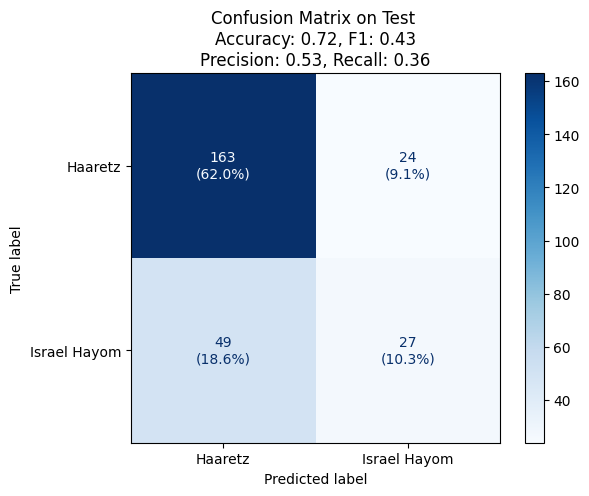


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 163
False Positives (Haaretz misclassified as Israel Hayom): 24
False Negatives (Israel Hayom misclassified as Haaretz): 49
True Positives (Correctly identified Israel Hayom): 27

Accuracy: 0.722
F1 Score: 0.425
Precision: 0.529
Recall: 0.355


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline

# Split data
X_train = train_df['Title']
y_train = train_df['is_israel_hayom']
X_test = test_df['Title']
y_test = test_df['is_israel_hayom']

# Create pipeline with CountVectorizer and LogisticRegression
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression())
])

# Train and predict
pipeline.fit(X_train, y_train)
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

# Display metrics
print("\nTest Set Metrics:")
display_metrics(y_test, test_predictions, "Test")

In [25]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.2 MB/s eta 0:00:00


### Investigating Model Coefficients
The following bar chart shows the 25 largest and 25 smallest coefficients of the logistic regression model, with the bars showing the size of each coefficient. The negative coefficients on the left belong to words that, according to the model, indicate Haaretz's Titles, while the positive coefficients on the right belong to words that, according to the model, indicate Israel HaYom's Titles.

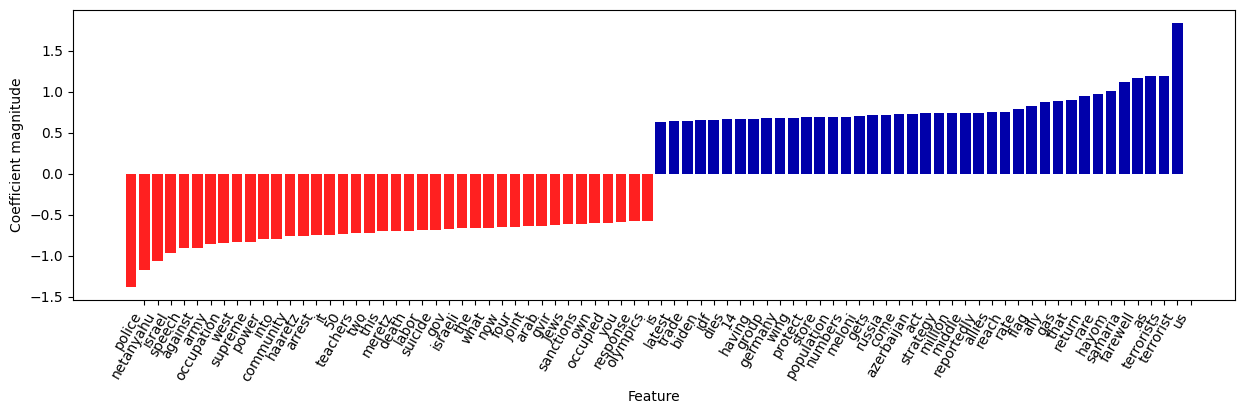

In [26]:
import mglearn
feature_names = pipeline.named_steps['vectorizer'].get_feature_names_out()
mglearn.tools.visualize_coefficients(
    pipeline.named_steps["classifier"].coef_, feature_names, n_top_features=40
)

## Model Selection
We conducted a comprehensive evaluation of various machine learning models (including Logistic Regression, SVM, Random Forest, Naive Bayes, and KNN) and text vectorization techniques (~TF-IDF (removed) and~ Count Vectorizer) for classifying news headlines by their source. Despite testing multiple model combinations and feature engineering approaches, none of the tested configurations outperformed our simple baseline of CountVectorizer with LogisticRegression. This finding suggests that for this specific text classification task, the straightforward approach of bag-of-words with logistic regression captures the essential patterns and the most effectively (so far),.


Overall Summary:
                Classifier  CV Accuracy (mean)    CV Std
0      Logistic Regression            0.725267  0.011413
2               Linear SVM            0.720528  0.009309
3            Random Forest            0.720528  0.005707
1  Multinomial Naive Bayes            0.718614  0.010568
4                      KNN            0.656827  0.019592

Best classifier: Logistic Regression
CV Accuracy: 0.725 (+/- 0.023)


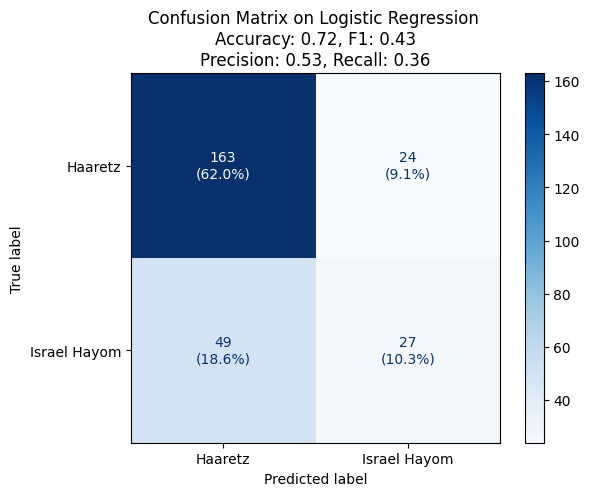


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 163
False Positives (Haaretz misclassified as Israel Hayom): 24
False Negatives (Israel Hayom misclassified as Haaretz): 49
True Positives (Correctly identified Israel Hayom): 27

Accuracy: 0.722
F1 Score: 0.425
Precision: 0.529
Recall: 0.355


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

def evaluate_classifier(clf_name, pipeline, X_train, y_train, X_test, y_test):
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    # Train on full training set and evaluate on test set
    pipeline.fit(X_train, y_train)
    test_predictions = pipeline.predict(X_test)

    return {
        'classifier': clf_name,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_predictions': test_predictions
    }

# Define classifiers with reasonable default parameters
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Linear SVM', LinearSVC()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=1))
]

# Store results
results = []

# Evaluate each classifier
for clf_name, clf in classifiers:
    try:
        pipeline = Pipeline([
            ('vectorizer', CountVectorizer()),
            ('classifier', clf)
        ])

        result = evaluate_classifier(clf_name, pipeline, X_train, y_train, X_test, y_test)
        results.append(result)

    except Exception as e:
        print(f"\nError with {clf_name}: {str(e)}")

# Create summary DataFrame
summary = pd.DataFrame([{
    'Classifier': r['classifier'],
    'CV Accuracy (mean)': r['cv_mean'],
    'CV Std': r['cv_std']
} for r in results])

print("\nOverall Summary:")
print(summary.sort_values('CV Accuracy (mean)', ascending=False))

# Find best performing classifier
best_result = max(results, key=lambda x: x['cv_mean'])
print(f"\nBest classifier: {best_result['classifier']}")
print(f"CV Accuracy: {best_result['cv_mean']:.3f} (+/- {best_result['cv_std'] * 2:.3f})")
display_metrics(y_test, best_result['test_predictions'], f"{best_result['classifier']}")

## Hyperparameter Tuning

In [28]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array().flatten()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [29]:
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(CountVectorizer(), LogisticRegression())
param_grid = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100,1000],
    "countvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best cross-validation score: {grid.best_score_:.2f}")
print("Best parameters:\n", grid.best_params_)

Best cross-validation score: 0.74
Best parameters:
 {'countvectorizer__ngram_range': (1, 2), 'logisticregression__C': 1000}


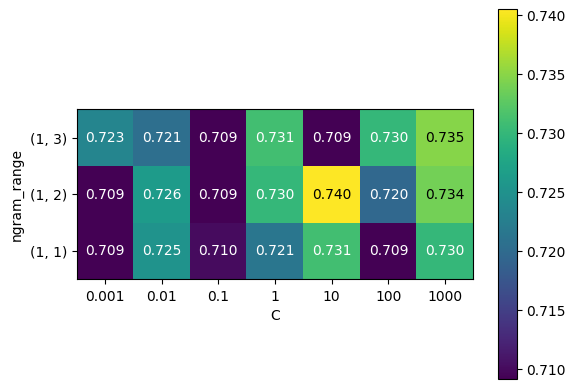

In [30]:
# Extract the scores and reshape them to a 2D array
scores = grid.cv_results_['mean_test_score'].reshape(-1,3).T

heatmap = heatmap(
    scores,
    xlabel="C",
    ylabel="ngram_range",
    cmap="viridis",
    fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['countvectorizer__ngram_range']
)

plt.colorbar(heatmap)
plt.show()

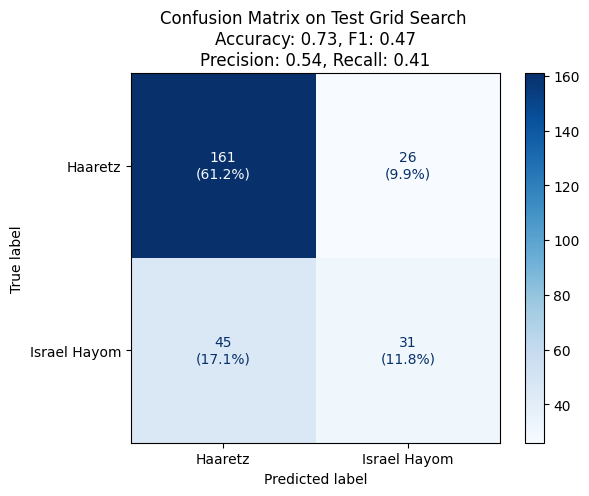


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 161
False Positives (Haaretz misclassified as Israel Hayom): 26
False Negatives (Israel Hayom misclassified as Haaretz): 45
True Positives (Correctly identified Israel Hayom): 31

Accuracy: 0.730
F1 Score: 0.466
Precision: 0.544
Recall: 0.408


In [31]:
display_metrics(y_test, grid.predict(X_test), "Test Grid Search")

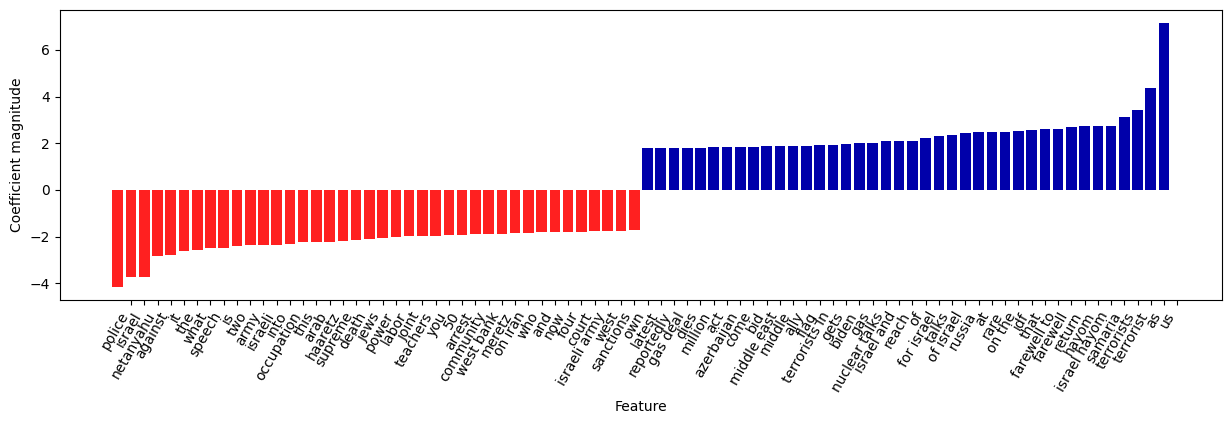

In [32]:
feature_names = grid.best_estimator_.named_steps['countvectorizer'].get_feature_names_out()
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_, feature_names, n_top_features=40
)

## Model Improvement 1: Add doc2vec as feature

<img src="https://www.mermaidchart.com/raw/06765a16-3b69-4777-8add-fa67f6523d9f?theme=light&version=v0.1&format=png" width="480">

## Training Step (`pipeline.fit(X_train, y_train)`)

1. **Feature Generation**:
   - The `FeatureUnion` processes the input texts in parallel through two paths:
     * Path 1: `CountVectorizer` converts texts into a sparse matrix [documents × vocabulary]
       - Example: "I love dogs" → [1,1,1,0,0] (where indices represent "I", "love", "dogs", "cats", "house")
     * Path 2: `SpacyVectorTransformer` converts each text into a 300-dimensional vector
       - Example: "I love dogs" → [0.2, -0.1, ..., 0.5] (300 numbers representing semantic meaning)

2. **Feature Combination**:
   - `FeatureUnion` concatenates the features horizontally
   - Final matrix shape: [n_documents × (vocabulary_size + 300)]
   - Example: [1,1,1,0,0, 0.2,-0.1,...,0.5]

3. **Classifier Training**:
   - LogisticRegression learns weights for all features together
   - It treats both bag-of-words and embedding features equally

## Prediction Step (`pipeline.predict(X_test)`)

1. **Same Feature Generation**:
   - New texts go through identical transformation processes
   - CountVectorizer uses the vocabulary learned during training
   - SpacyVectorTransformer creates embeddings using the same spaCy model

2. **Feature Combination**:
   - Features are concatenated in the same order as during training

3. **Classification**:
   - LogisticRegression applies learned weights to the combined features
   - Outputs prediction: Israel Hayom (1) or Haaretz (0)

This combined approach lets the model use both explicit word occurrences and semantic meaning for classification.


In [33]:
!pip install spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Fitting pipeline...
Making predictions...

Test Set Metrics:


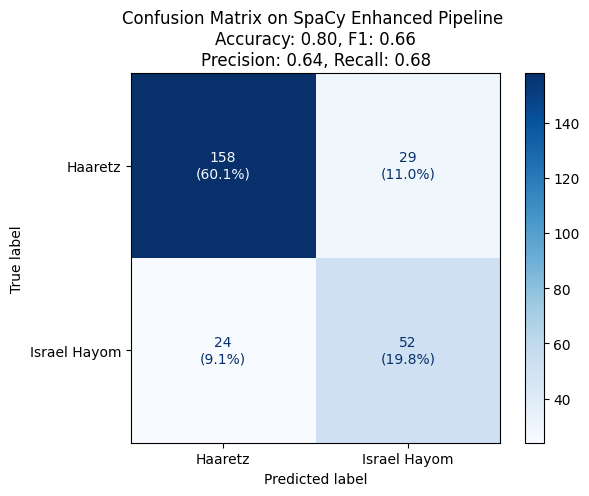


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 158
False Positives (Haaretz misclassified as Israel Hayom): 29
False Negatives (Israel Hayom misclassified as Haaretz): 24
True Positives (Correctly identified Israel Hayom): 52

Accuracy: 0.798
F1 Score: 0.662
Precision: 0.642
Recall: 0.684


In [34]:
import spacy
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Load spaCy model with minimal components
nlp = spacy.load("en_core_web_lg", disable=["tagger", "parser", "ner"])

class SpacyVectorTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self # Empty fit() methods since transformers don't need training

    def transform(self, X):
        # combines document vectors into a single matrix for batch processing
        return np.vstack([nlp(text).vector for text in X])

# Create pipeline
pipeline = Pipeline([
    # FeatureUnion enables parallel processing of different feature types
    ('features', FeatureUnion([
        ('vectorizer', CountVectorizer()),
        ('spacy_vectors', SpacyVectorTransformer())
    ])),
    ('classifier', LogisticRegression())
])

# Fit and evaluate
print("Fitting pipeline...")
pipeline.fit(X_train, y_train)

print("Making predictions...")
y_pred = pipeline.predict(X_test)

print("\nTest Set Metrics:")
display_metrics(y_test, y_pred, "SpaCy Enhanced Pipeline")

In [35]:
pipeline.named_steps['features'].transformer_list

[('vectorizer', CountVectorizer()),
 ('spacy_vectors', SpacyVectorTransformer())]

In [36]:
spacy_tranformer = pipeline.named_steps['features'].transformer_list[1][1]
list_of_titles = ["headline 1", "headline 2"]
r = spacy_tranformer.transform(list_of_titles)
d = r.shape[1] # number of elements in a vector for each title

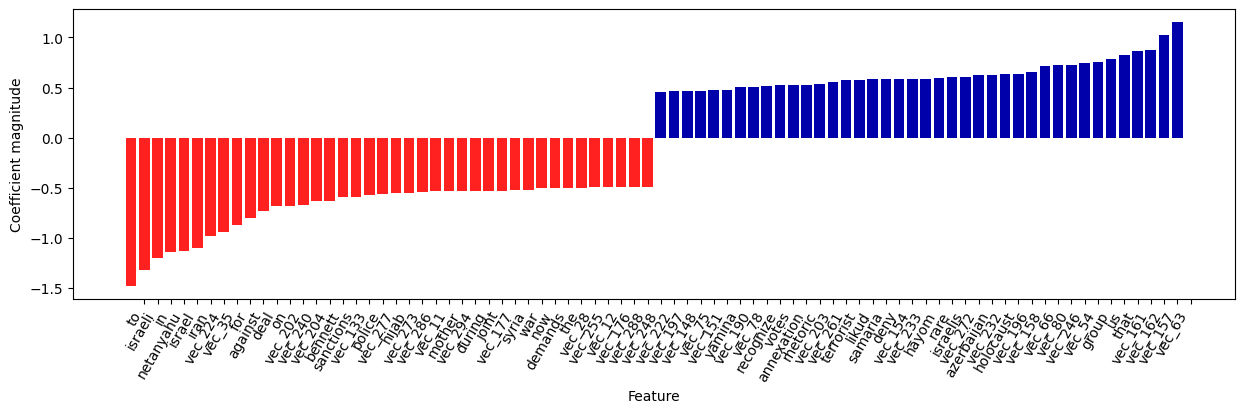

In [37]:
# Visualize logistic regression coefficients
count_vectorizer_features = pipeline.named_steps['features'].transformer_list[0][1].get_feature_names_out().tolist()
spacy_feature_names = [f"vec_{i}" for i in range(d)]
all_feature_names = count_vectorizer_features + spacy_feature_names
coefs = pipeline.named_steps['classifier'].coef_[0]
mglearn.tools.visualize_coefficients(coefs, all_feature_names, n_top_features=40)

### Improvement 2: Add Statistical Features

<img src="https://www.mermaidchart.com/raw/d1e932eb-7cd3-4a46-818c-2efc238ba2ae?theme=light&version=v0.1&format=svg" width="720">


Fitting pipeline...
Making predictions...

Test Set Metrics:


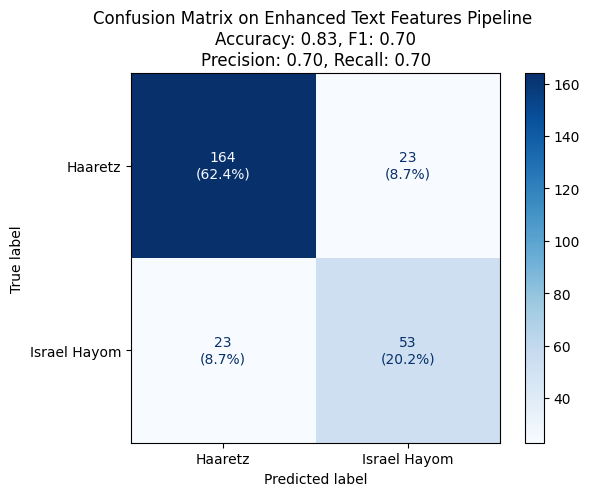


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 164
False Positives (Haaretz misclassified as Israel Hayom): 23
False Negatives (Israel Hayom misclassified as Haaretz): 23
True Positives (Correctly identified Israel Hayom): 53

Accuracy: 0.825
F1 Score: 0.697
Precision: 0.697
Recall: 0.697


In [38]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Load spaCy model with minimal components
nlp = spacy.load("en_core_web_lg", disable=["tagger", "parser", "ner"])
nlp.add_pipe('sentencizer')  # Added for sentence boundary detection

class SpacyVectorTransformer(BaseEstimator, TransformerMixin):
   def fit(self, X, y=None):
       return self

   def transform(self, X):
       return np.vstack([nlp(text).vector for text in X])

class TextStatsTransformer(BaseEstimator, TransformerMixin):
   def fit(self, X, y=None):
       return self

   def transform(self, X):
       features = []
       for text in X:
           doc = nlp(text)
           stats = [
               len(text.split()),  # Total words
               len([sent for sent in doc.sents]),  # Sentence count - requires sentencizer
               len([w for w in doc if w.is_punct]),  # Punctuation marks
               len([w for w in doc if w.like_num]),  # Numerical values
               len([w for w in doc if w.is_upper])  # Uppercase words
           ]
           features.append(stats)
       return np.array(features)

# Create pipeline
pipeline = Pipeline([
   ('features', FeatureUnion([
       ('bow', CountVectorizer()),
       ('spacy_vectors', SpacyVectorTransformer()),
       ('text_stats', TextStatsTransformer())
   ])),
   ('classifier', LogisticRegression())
])

# Fit and evaluate
print("Fitting pipeline...")
pipeline.fit(X_train, y_train)

print("Making predictions...")
y_pred = pipeline.predict(X_test)

print("\nTest Set Metrics:")
display_metrics(y_test, y_pred, "Enhanced Text Features Pipeline")

# Advanced NLP Methods: LLMs based approached
- BART embeddings implementation
- Performance comparison

## Bart feature extraction

### Why BART
BART-base represents a good balance between performance and computational efficiency for feature extraction. It's pre-trained on large-scale text data and can capture semantic meaning well, while being lighter than larger models like BART-large or RoBERTa.


In [39]:
!pip install transformers

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

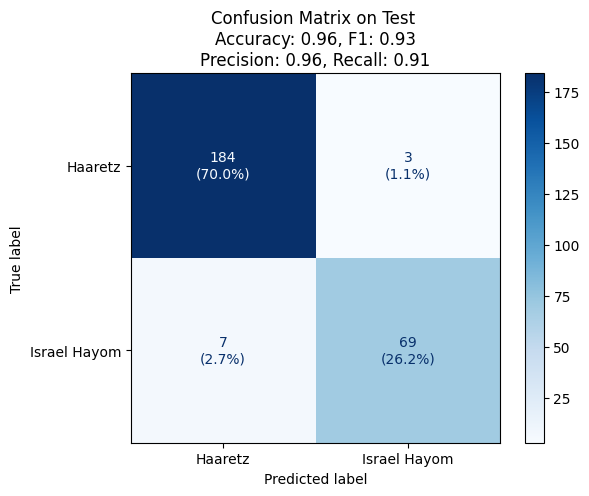


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 184
False Positives (Haaretz misclassified as Israel Hayom): 3
False Negatives (Israel Hayom misclassified as Haaretz): 7
True Positives (Correctly identified Israel Hayom): 69

Accuracy: 0.962
F1 Score: 0.932
Precision: 0.958
Recall: 0.908


In [40]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.linear_model import LogisticRegressionCV

def get_embeddings(texts, model_name='facebook/bart-base'):
    # Initialize
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)

    # Process texts
    encoded = tokenizer(texts,
                       padding=True,
                       truncation=True,
                       max_length=512,
                       return_tensors='pt')

    # Get embeddings
    with torch.no_grad():
        outputs = model(**encoded)
        # Mean pooling
        embeddings = outputs.last_hidden_state.mean(dim=1).numpy()

    return embeddings

# Process train and test data
X_train_emb = get_embeddings([t.decode() if isinstance(t, bytes) else t for t in X_train])
X_test_emb = get_embeddings([t.decode() if isinstance(t, bytes) else t for t in X_test])

# Train and predict
clf = LogisticRegressionCV(max_iter=1000, cv=5)
clf.fit(X_train_emb, y_train)
predictions = clf.predict(X_test_emb)
display_metrics(y_test, predictions, "Test")

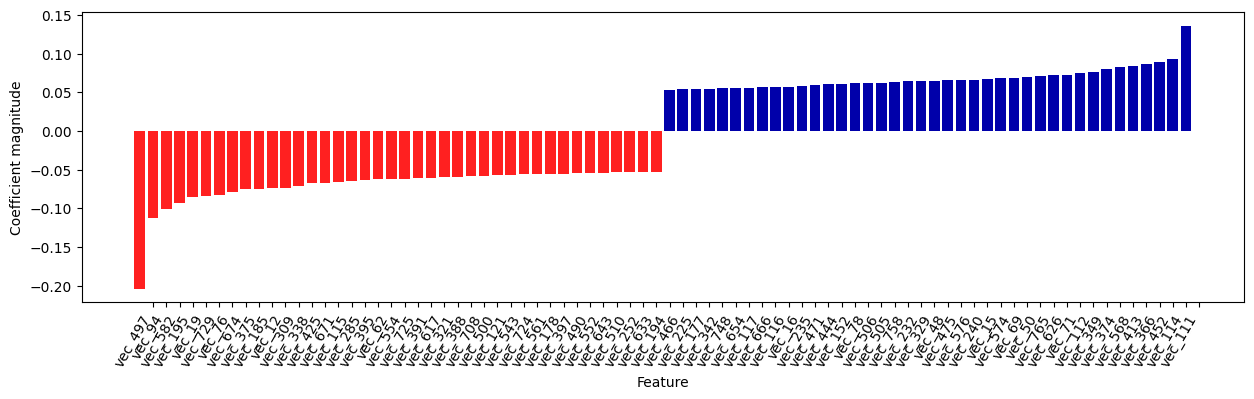

In [42]:
# Visualize logistic regression coefficients
d = 768
bart_feature_names = [f"vec_{i}" for i in range(d)]
mglearn.tools.visualize_coefficients(
    pipeline.named_steps["classifier"].coef_, bart_feature_names, n_top_features=40
)

## Bart Zero Short Learning

In [1]:
!pip install transformers torch datasets
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 11.7 MB/s eta 0:00:00


### Reduce dataset for faster inference

In [13]:
import os
import torch
import numpy as np
import pandas as pd
from datasets import Dataset
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from transformers import pipeline
from sklearn.model_selection import train_test_split
from transformers import BartTokenizer, BartForSequenceClassification, Trainer, TrainingArguments
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

def display_metrics(y_true, y_pred, dataset_name="Test"):
    """
    Display confusion matrix and key metrics

    Args:
        y_true: True labels
        y_pred: Predicted labels
        dataset_name: Name of the dataset for display purposes
    """
    # Create confusion matrix display
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=["Haaretz", "Israel Hayom"],
        cmap=plt.cm.Blues
    )

    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    # Add title with metrics
    disp.ax_.set_title(f"Confusion Matrix on {dataset_name} \n" +
                      f"Accuracy: {accuracy:.2f}, F1: {f1:.2f}\n" +
                      f"Precision: {precision:.2f}, Recall: {recall:.2f}")

    # Add value annotations to the confusion matrix
    total = tn + fp + fn + tp
    for i in range(2):
        for j in range(2):
            value = disp.confusion_matrix[i, j]
            percentage = value / total * 100
            disp.text_[i, j].set_text(f'{value}\n({percentage:.1f}%)')

    plt.show()

    # Print detailed metrics
    print("\nDetailed Metrics:")
    print(f"True Negatives (Correctly identified Haaretz): {tn}")
    print(f"False Positives (Haaretz misclassified as Israel Hayom): {fp}")
    print(f"False Negatives (Israel Hayom misclassified as Haaretz): {fn}")
    print(f"True Positives (Correctly identified Israel Hayom): {tp}")
    print(f"\nAccuracy: {accuracy:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")

In [3]:
israel_hayom_df = pd.read_csv('israel_hayom.csv')
haaretz_df = pd.read_csv('haaretz.csv')

# Add source label column
israel_hayom_df['is_israel_hayom'] = 1
haaretz_df['is_israel_hayom'] = 0

# Combine the dataframes
combined_df = pd.concat([israel_hayom_df, haaretz_df])

# Remove any duplicates if needed based on Title
combined_df = combined_df[~combined_df['Title'].duplicated(keep='first')]

# Filter date range
real_overlap = (combined_df['Date'] >= '2022-08-24') & (combined_df['Date'] <= '2022-09-30')
filtered_df = combined_df[real_overlap]

# Get minimum count per date between sources
counts = filtered_df.groupby(['Date', 'is_israel_hayom']).size().unstack().fillna(0)
min_counts = counts.min(axis=1).astype(int)

# Create balanced dataset
ratio = 1
balanced_dfs = []
for date in min_counts.index:
   min_count = min_counts[date] * ratio
   if min_count > 0:
       date_df = filtered_df[filtered_df['Date'] == date]
       balanced_dfs.append(date_df[date_df['is_israel_hayom'] == 0].head(min_count))
       balanced_dfs.append(date_df[date_df['is_israel_hayom'] == 1].head(min_count))

df = pd.concat(balanced_dfs)
print(f"Original: {len(filtered_df)}, Balanced: {len(df)}")
print("\nArticles per source:", df['is_israel_hayom'].value_counts())

Original: 1213, Balanced: 560

Articles per source: is_israel_hayom
0    280
1    280
Name: count, dtype: int64


In [4]:
# Split into training and test sets
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['is_israel_hayom']
)

In [5]:
train_df.shape

(448, 4)

## LLM zere-shot classification
We can see that unless we use state of the art models (Claude, GPT), then the models are not powerful enough to capture the comlexities of the Israeli politics. However, When we used BART-base for embeddings + LogisticRegression, we're:

* Getting rich contextual representations of the text
* Letting the LogisticRegression learn the specific patterns that distinguish the newspapers
Training on actual examples rather than relying on zero-shot inference

### Out of the shelf results

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

100%|██████████| 560/560 [00:24<00:00, 22.75it/s]


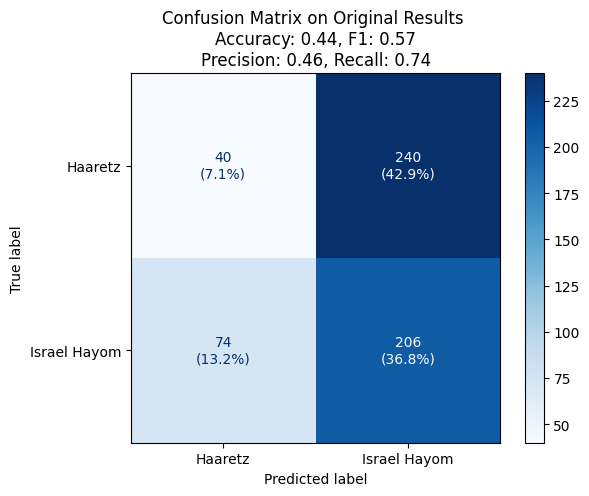


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 40
False Positives (Haaretz misclassified as Israel Hayom): 240
False Negatives (Israel Hayom misclassified as Haaretz): 74
True Positives (Correctly identified Israel Hayom): 206

Accuracy: 0.439
F1 Score: 0.567
Precision: 0.462
Recall: 0.736


In [7]:
classifier = pipeline("zero-shot-classification",
                    model="facebook/bart-large-mnli",
                    device=device)

base_model_predictions = []
for headline in tqdm(df['Title']):
   result = classifier(headline,
                      candidate_labels=["liberal", "conservative"],
                      hypothesis_template="This headline expresses a {} viewpoint.")
   pred = 0 if result['labels'][0] == 'liberal' else 1
   base_model_predictions.append(pred)

display_metrics(df['is_israel_hayom'], base_model_predictions, "Original Results")

## Finetune BART
The zero-shot classification results demonstrate clear limitations, as expected when using a pre-trained model for such a specialized task. To improve performance, we'll explore model fine-tuning approaches. However, since bart-large-mnli requires significant computational resources and memory, we'll use the more lightweight bart-base model for our experiments.
For small datasets like our newspaper headlines collection, shallow fine-tuning (updating only the top few layers) is often a more appropriate approach. This is primarily because:

* It's more computationally efficient
* It preserves the rich linguistic knowledge learned during pre-training in the lower layers
* It focuses the learning on adapting the task-specific layers for our classification problem

We'll implement and compare both shallow and full fine-tuning approaches to demonstrate different algorithmic strategies and their practical implementations, showing the tradeoffs and considerations for each method.

In [18]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Custom trainer class that extends Huggingface's Trainer to provide better progress visualization
class CustomTrainer(Trainer):
    def log(self, logs):
        """
        Override default logging to show detailed training progress
        Adds epoch information and maintains training history
        """
        if self.state.epoch is not None:
            logs["epoch"] = round(self.state.epoch, 2)
        output = {**logs}
        self.state.log_history.append(output)
        self.control = self.callback_handler.on_log(self.args, self.state, self.control, logs)

def compute_metrics(pred):
    """
    Calculate metrics for binary classification task
    Args:
        pred: contains predictions and label_ids from model
    Returns:
        dict: containing accuracy, F1 score, precision, and recall
    """
    labels = pred.label_ids
    # Handle BART's specific prediction output format which can be tuple
    preds = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    preds = np.argmax(preds, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

def prepare_dataset(df_subset, tokenizer):
    """
    Convert DataFrame to HuggingFace Dataset format and tokenize text
    Args:
        df_subset: pandas DataFrame containing 'Title' and 'is_israel_hayom' columns
        tokenizer: BART tokenizer instance
    Returns:
        Dataset: HuggingFace Dataset ready for training
    """
    # Convert DataFrame to Dataset format
    dataset = Dataset.from_dict({
        'text': df_subset['Title'].tolist(),
        'label': df_subset['is_israel_hayom'].tolist()
    })

    def tokenize_function(examples):
        """
        Tokenize text using BART tokenizer
        Includes padding and truncation for consistent tensor shapes
        """
        return tokenizer(
            examples['text'],
            padding='max_length',    # Pad all sequences to same length
            truncation=True,         # Truncate sequences longer than max_length
            max_length=128,          # Set max length - headlines rarely exceed this
            return_tensors="pt"      # Return PyTorch tensors
        )

    # Apply tokenization to dataset with progress bar
    tokenized_dataset = dataset.map(
        tokenize_function,
        batched=True,                # Process in batches for efficiency
        remove_columns=dataset.column_names,  # Remove original text columns
        desc="Tokenizing"            # Progress bar description
    )

    # Add labels column to tokenized dataset
    return tokenized_dataset.add_column('labels', df_subset['is_israel_hayom'].tolist())

def train_model(df, model_save_path="./best_model"):
    """
    Main training function that handles model initialization, training, and saving
    Optimized for L4 GPU on Google Colab

    Args:
        df: pandas DataFrame containing training data
        model_save_path: path to save the trained model
    Returns:
        tuple: (trainer, tokenizer) for further use or evaluation
    """
    print("Preparing training...")

    # Calculate class weights to handle potential class imbalance
    total = len(df)
    haaretz_samples = total - df['is_israel_hayom'].sum()
    israel_hayom_samples = df['is_israel_hayom'].sum()
    neg_weight = total / haaretz_samples
    pos_weight = total / israel_hayom_samples

    # Split data into train and validation sets while maintaining class distribution
    with tqdm(total=1, desc="Splitting data") as pbar:
        train_df, val_df = train_test_split(
            df,
            test_size=0.2,           # 80-20 split ratio
            stratify=df['is_israel_hayom'],  # Maintain class distribution
            random_state=42          # For reproducibility
        )
        pbar.update(1)

    print(f"Training set size: {len(train_df)}, Validation set size: {len(val_df)}")

    # Initialize BART model and tokenizer
    print("Loading model and tokenizer...")
    tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
    model = BartForSequenceClassification.from_pretrained(
        'facebook/bart-base',
        num_labels=2,                # Binary classification task
        problem_type="single_label_classification"
    )

    # Move model to GPU if available (optimized for L4)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Store class weights in model config for potential use during training
    model.config.class_weights = [neg_weight, pos_weight]

    # Prepare datasets for training and validation
    train_dataset = prepare_dataset(train_df, tokenizer)
    val_dataset = prepare_dataset(val_df, tokenizer)

    # Define training arguments optimized for L4 GPU
    training_args = TrainingArguments(
        output_dir=f"./{model_save_path}",
        learning_rate=2e-5,          # Conservative learning rate for fine-tuning
        per_device_train_batch_size=16,  # Optimized for L4 GPU memory
        per_device_eval_batch_size=16,   # Same as training batch size
        num_train_epochs=5,          # Number of training epochs
        weight_decay=0.01,           # L2 regularization
        logging_dir=f'./{model_save_path}/logs',
        logging_steps=10,            # Log every 10 steps
        evaluation_strategy="epoch",  # Evaluate after each epoch
        save_strategy="epoch",       # Save model after each epoch
        load_best_model_at_end=True, # Keep the best performing model
        metric_for_best_model="f1",  # Use F1 score for model selection
        save_total_limit=1,          # Keep only the best model to save space
        fp16=True,                   # Use mixed precision training for better performance
        disable_tqdm=False,          # Show progress bars
        logging_first_step=True,     # Log the first training step
    )

    # Initialize trainer with custom progress tracking
    trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    print("\nStarting training...")
    train_results = trainer.train()

    # Evaluate the final model
    print("\nEvaluating...")
    eval_results = trainer.evaluate()

    # Create directory for model if it doesn't exist
    if not os.path.exists(model_save_path):
        os.makedirs(model_save_path)

    # Save the trained model and tokenizer
    print("\nSaving models...")
    trainer.save_model(f"{model_save_path}/original")
    tokenizer.save_pretrained(f"{model_save_path}/original")

    return trainer, tokenizer

In [22]:
%%time
trainer, tokenizer = train_model(df, model_save_path="./fullly_tuned_model")

Preparing training...


Splitting data: 100%|██████████| 1/1 [00:00<00:00, 283.78it/s]

Training set size: 448, Validation set size: 112
Loading model and tokenizer...



Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenizing:   0%|          | 0/448 [00:00<?, ? examples/s]

Tokenizing:   0%|          | 0/112 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(



Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.217700,0.244877,0.910714,0.916667,0.859375,0.982143
2,0.163300,0.213402,0.937500,0.939130,0.915254,0.964286
3,0.153300,0.184080,0.937500,0.935780,0.962264,0.910714
4,0.087000,0.251208,0.937500,0.940171,0.901639,0.982143
5,0.029800,0.238387,0.937500,0.939130,0.915254,0.964286


/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:388: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning will become an exception in the future.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:388: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning 


Evaluating...



Saving models...


/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:388: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning will become an exception in the future.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}
  warnings.warn(


CPU times: user 29.1 s, sys: 14 s, total: 43.1 s
Wall time: 55.6 s


### Fully finetuned evaluation

Tokenizing:   0%|          | 0/112 [00:00<?, ? examples/s]


Results on test set:


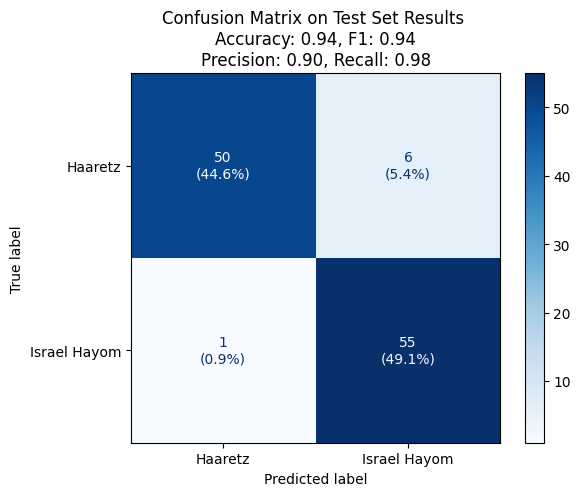


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 50
False Positives (Haaretz misclassified as Israel Hayom): 6
False Negatives (Israel Hayom misclassified as Haaretz): 1
True Positives (Correctly identified Israel Hayom): 55

Accuracy: 0.938
F1 Score: 0.940
Precision: 0.902
Recall: 0.982


In [23]:
# Evaluate on test set using original model
test_dataset = prepare_dataset(test_df, tokenizer)
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions[0], axis=1)
labels = predictions.label_ids
print("\nResults on test set:")
display_metrics(labels, preds, "Test Set Results")

### Fully finetuned Quantized Model

In [26]:
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
from transformers import BitsAndBytesConfig, BartTokenizer, BartForSequenceClassification, Trainer, TrainingArguments
import torch
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset

def train_qlora(train_df, output_dir="./results_qlora"):
    """
    Train a model using QLoRA (Quantized Low-Rank Adaptation) optimized for L4 GPU
    Uses BART-base model with 4-bit quantization and LoRA for efficient fine-tuning

    Args:
        train_df: DataFrame with columns 'Title' and 'is_israel_hayom'
        output_dir: Directory to save model and checkpoints

    Returns:
        trainer: Trained Trainer object
        model: Trained model
        tokenizer: Tokenizer object
    """
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)

    # Initialize BART tokenizer specifically
    print("Loading tokenizer...")
    tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')

    # Split data maintaining class distribution
    train_subset, val_df = train_test_split(
        train_df,
        test_size=0.2,
        stratify=train_df['is_israel_hayom'],
        random_state=42
    )
    print(f"Training set size: {len(train_subset)}, Validation set size: {len(val_df)}")

    # Prepare datasets with tokenization
    print("Preparing datasets...")
    train_dataset = prepare_dataset(train_subset, tokenizer)
    val_dataset = prepare_dataset(val_df, tokenizer)

    # Load BART model with 4-bit quantization
    print("Loading model in 4-bit precision...")
    model = BartForSequenceClassification.from_pretrained(
        'facebook/bart-base',
        num_labels=2,
        quantization_config=BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_compute_dtype=torch.float16,
            bnb_4bit_use_double_quant=True,         # Double quantization for memory efficiency
            bnb_4bit_quant_type="nf4"              # NF4 data type for better accuracy
        ),
        device_map="auto"  # Automatically handle device placement
    )

    # Prepare model for quantized training
    model = prepare_model_for_kbit_training(model)

    # Configure LoRA parameters optimized for the task
    print("Configuring LoRA...")
    lora_config = LoraConfig(
        r=16,                    # Rank of update matrices
        lora_alpha=32,           # Alpha parameter for LoRA scaling
        target_modules=["q_proj", "k_proj", "v_proj", "out_proj"],
        lora_dropout=0.05,       # Dropout probability for LoRA layers
        bias="none",             # Don't train bias parameters
        task_type="SEQ_CLS"      # Sequence classification task
    )

    # Apply LoRA to model
    model = get_peft_model(model, lora_config)

    # Print trainable parameters statistics
    print("\nModel Parameters Summary:")
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        num_params = param.numel()
        all_param += num_params
        if param.requires_grad:
            trainable_params += num_params
    print(f"Trainable params: {trainable_params:,}")
    print(f"Total params: {all_param:,}")
    print(f"Trainable percentage: {100 * trainable_params / all_param:.2f}%")

    # Configure training arguments optimized for L4 GPU
    training_args = TrainingArguments(
        output_dir=output_dir,
        learning_rate=2e-4,
        per_device_train_batch_size=8,   # Adjusted for L4 GPU memory with 4-bit quantization
        per_device_eval_batch_size=8,
        num_train_epochs=5,
        weight_decay=0.01,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        save_total_limit=1,              # Save space by keeping only best model
        fp16=True,                       # Mixed precision training for L4 GPU
        gradient_checkpointing=False,
    )

    # Initialize trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics,
    )

    print("\nStarting training...")
    trainer.train()

    print("\nSaving model...")
    trainer.save_model(f"{output_dir}/final_model")

    return trainer, model, tokenizer

def test_qlora(test_df, trainer, tokenizer, display_metrics_func):
    """
    Test a trained QLoRA model

    Args:
        test_df: DataFrame with columns 'Title' and 'is_israel_hayom'
        trainer: Trained Trainer object
        tokenizer: Tokenizer object
        display_metrics_func: Function to display metrics

    Returns:
        dict: Dictionary containing test results
    """
    print("Preparing test dataset...")
    test_dataset = prepare_dataset(test_df, tokenizer)

    print("Running predictions...")
    test_results = trainer.predict(test_dataset)
    test_preds = np.argmax(test_results.predictions[0], axis=-1)

    print("\nTest Set Results:")
    display_metrics_func(test_results.label_ids, test_preds, "QLoRA Model Test Results")

    return {
        'predictions': test_preds,
        'labels': test_results.label_ids,
        'raw_predictions': test_results.predictions[0]
    }

def prepare_dataset(df_subset, tokenizer):
    """
    Prepare dataset for transformer model

    Args:
        df_subset: DataFrame with 'Title' and 'is_israel_hayom' columns
        tokenizer: Tokenizer object

    Returns:
        Dataset: HuggingFace dataset object
    """
    dataset = Dataset.from_dict({
        'text': df_subset['Title'].tolist(),
        'label': df_subset['is_israel_hayom'].tolist()
    })

    def tokenize_function(examples):
        return tokenizer(
            examples['text'],
            padding='max_length',
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )

    tokenized_dataset = dataset.map(
        tokenize_function,
        batched=True,
        remove_columns=dataset.column_names
    )

    return tokenized_dataset.add_column('labels', df_subset['is_israel_hayom'].tolist())

def compute_metrics(pred):
    """
    Calculate metrics for binary classification task
    Args:
        pred: contains predictions and label_ids from model
    Returns:
        dict: containing accuracy, F1 score, precision, and recall
    """
    labels = pred.label_ids
    # Handle BART's specific prediction output format which can be tuple
    preds = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    preds = np.argmax(preds, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [27]:
%%time

# Split into train and test
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['is_israel_hayom'], random_state=42)

# Train the model
trainer_q, model_q, tokenizer_q = train_qlora(train_df)

Loading tokenizer...
Training set size: 358, Validation set size: 90
Preparing datasets...


Map:   0%|          | 0/358 [00:00<?, ? examples/s]

Map:   0%|          | 0/90 [00:00<?, ? examples/s]

Loading model in 4-bit precision...


Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Configuring LoRA...

Model Parameters Summary:
Trainable params: 1,781,792
Total params: 91,954,210
Trainable percentage: 1.94%

Starting training...


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.498599,0.877778,0.891089,0.803571,1.000000
2,No log,0.386403,0.877778,0.891089,0.803571,1.000000
3,No log,0.324345,0.877778,0.891089,0.803571,1.000000
4,No log,0.305502,0.877778,0.891089,0.803571,1.000000
5,No log,0.299621,0.877778,0.891089,0.803571,1.000000


/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentran


Saving model...
CPU times: user 31.6 s, sys: 440 ms, total: 32.1 s
Wall time: 32.6 s


### Fully finetuned quantized model evaluation

100%|██████████| 112/112 [00:07<00:00, 14.21it/s]


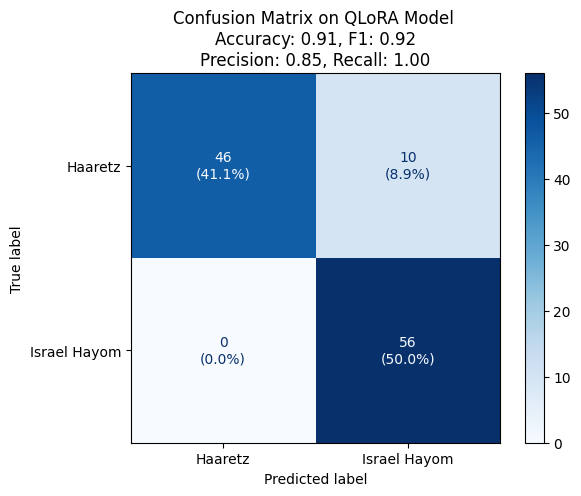


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 46
False Positives (Haaretz misclassified as Israel Hayom): 10
False Negatives (Israel Hayom misclassified as Haaretz): 0
True Positives (Correctly identified Israel Hayom): 56

Accuracy: 0.911
F1 Score: 0.918
Precision: 0.848
Recall: 1.000


In [29]:
# Initialize lists to store predictions
qlora_preds = []

# Move to GPU and set to evaluation mode
model_q.eval()
model_q = model_q.to('cuda')

# Run predictions with progress bar
with torch.no_grad():
    for title in tqdm(test_df['Title']):
        # Tokenize and move to GPU
        inputs = tokenizer_q(
            title,
            return_tensors='pt',
            truncation=True,
            padding=True
        )
        # Move inputs to GPU
        inputs = {k: v.to('cuda') for k, v in inputs.items()}

        # Get model outputs
        outputs = model_q(**inputs)

        # Get prediction and move to CPU for storage
        pred = torch.argmax(outputs.logits).cpu().item()
        qlora_preds.append(pred)

# Display metrics
display_metrics(test_df['is_israel_hayom'], qlora_preds, "QLoRA Model")

### Shallow fine-tuning

In [30]:
def prepare_dataset(df, tokenizer):
    """Prepare and tokenize dataset in one go for efficiency"""
    dataset = Dataset.from_dict({
        'text': df['Title'].tolist(),
        'label': df['is_israel_hayom'].tolist()
    })

    def tokenize_function(examples):
        return tokenizer(
            examples['text'],
            padding='max_length',
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )

    tokenized_dataset = dataset.map(
        tokenize_function,
        batched=True,
        remove_columns=dataset.column_names,
        desc="Tokenizing"
    )

    return tokenized_dataset.add_column('labels', df['is_israel_hayom'].tolist())

# Initialize BART-specific tokenizer and model
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
head_only_model = BartForSequenceClassification.from_pretrained(
    'facebook/bart-base',
    num_labels=2,
    ignore_mismatched_sizes=True
)

# Move model to GPU
head_only_model.to(device)

# Freeze backbone, keep head trainable
for backbone_param in head_only_model.model.parameters():
    backbone_param.requires_grad = False
for head_param in head_only_model.classification_head.parameters():
    head_param.requires_grad = True

# Prepare datasets with BART tokenizer
train_dataset = prepare_dataset(train_df, tokenizer)
test_dataset = prepare_dataset(test_df, tokenizer)

# Configure training arguments optimized for L4 GPU
training_args = TrainingArguments(
    output_dir="./bart-head-only-classifier",
    learning_rate=1e-3,
    per_device_train_batch_size=16,  # L4 GPU can handle this batch size
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    save_strategy="epoch",
    evaluation_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    fp16=True,
    gradient_accumulation_steps=1,
    warmup_steps=100,
    logging_steps=10,
    save_total_limit=1,          # Save disk space
)

# Initialize trainer with compute_metrics
trainer = Trainer(
    model=head_only_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Tokenizing:   0%|          | 0/448 [00:00<?, ? examples/s]

Tokenizing:   0%|          | 0/112 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [31]:
# Train
print("Starting training...")
trainer.train()

Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.331000,0.295492,0.910714,0.918033,0.848485,1.000000
2,0.207700,0.340643,0.901786,0.909091,0.846154,0.982143
3,0.217700,0.185887,0.937500,0.939130,0.915254,0.964286
4,0.142100,0.210124,0.919643,0.921739,0.898305,0.946429
5,0.114300,0.507850,0.910714,0.918033,0.848485,1.000000


/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:388: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning will become an exception in the future.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:388: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning 

TrainOutput(global_step=140, training_loss=0.20595702954701015, metrics={'train_runtime': 14.9604, 'train_samples_per_second': 149.729, 'train_steps_per_second': 9.358, 'total_flos': 171744861388800.0, 'train_loss': 0.20595702954701015, 'epoch': 5.0})

Starting evaluation...


100%|██████████| 4/4 [00:00<00:00, 43.86it/s]


Test Set Results:


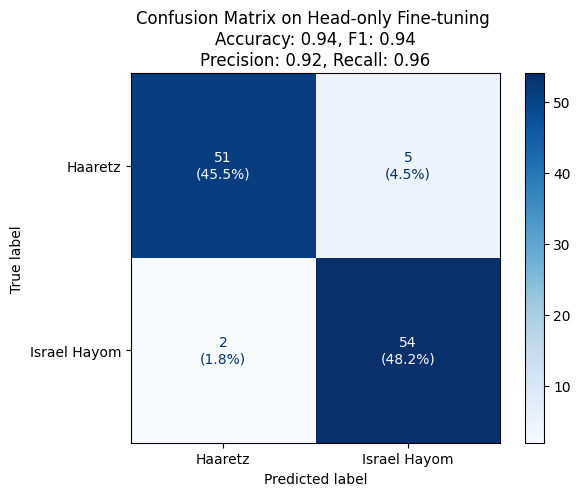


Detailed Metrics:
True Negatives (Correctly identified Haaretz): 51
False Positives (Haaretz misclassified as Israel Hayom): 5
False Negatives (Israel Hayom misclassified as Haaretz): 2
True Positives (Correctly identified Israel Hayom): 54

Accuracy: 0.938
F1 Score: 0.939
Precision: 0.915
Recall: 0.964


In [32]:
# Evaluate
print("Starting evaluation...")
head_only_model.eval()
predictions = []

# Batch processing for faster inference
batch_size = 32
with torch.no_grad():
    for i in tqdm(range(0, len(test_df), batch_size)):
        batch_titles = test_df['Title'][i:i+batch_size].tolist()
        inputs = tokenizer(
            batch_titles,
            return_tensors='pt',
            truncation=True,
            padding=True,
            max_length=128
        )
        # Move inputs to GPU
        inputs = {k: v.to(device) for k, v in inputs.items()}

        outputs = head_only_model(**inputs)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        predictions.extend(preds)

# Display metrics
print("\nTest Set Results:")
display_metrics(test_df['is_israel_hayom'], predictions, "Head-only Fine-tuning")

# Newspaper Headlines Classification Model Comparison

The project began with data collection from two distinct sources: web scraping Israel Hayom's daily archives using BeautifulSoup, and processing Haaretz's RSS feed data from XML files. After cleaning and combining the datasets, we gathered approximately 1,400 articles (477 from Israel Hayom and 933 from Haaretz) from August 2022, providing a robust dataset for our classification task.

## Understanding Accuracy vs F1-Score

F1-Score and Accuracy serve different purposes in model evaluation: Accuracy provides a straightforward measure of correct predictions but can be misleading with imbalanced data, while F1-Score balances precision and recall, making it particularly valuable for uneven class distributions. For instance, in a dataset with 90% negative samples, a model predicting all negatives would achieve 90% accuracy but an F1-Score of 0, exposing the model's complete failure to identify positive cases.

In practice, Accuracy is generally preferred for balanced multi-class classifications, while F1-Score is more appropriate for binary classifications with class imbalance or multi-label scenarios. In the sequal the table is sorted by the `f1-score`

## comparsion Table

| Model Type | Accuracy | F1 Score | Precision | Recall | Training Time | Dataset Size |
|------------|----------|-----------|------------|---------|---------------|--------------|
| CountVectorizer + LogReg - tuned | 0.730 | 0.466 | 0.544 | 0.408 | N/A | N/A |
| BART Large MNLI (Zero-shot) | 0.450 | 0.593 | 0.471 | 0.800 | None | None |
| Doc2Vec | 0.798 | 0.662 | 0.642 | 0.684 | N/A | N/A |
| Doc2Vec + Stats | 0.825 | 0.697 | 0.697 | 0.697 | N/A | N/A |
| QLoRA (Quantized) | 0.911 | 0.918 | 0.848 | 1.000 | 32.6s | 560 |
| BART Feature Extraction | 0.962 | 0.932 | 0.958 | 0.908 | None | None |
| Shallow Finetuning | 0.938 | 0.939 | 0.915 | 0.964 | N/A | 560 |
| Fully Tuned BART | 0.938 | 0.940 | 0.902 | 0.982 | 55.6s | 560 |
| Author-Based* | 0.992 | 0.987 | 1.000 | 0.974 | N/A | N/A |

*Note: Author-Based approach relies on direct author mapping, which effectively memorizes patterns rather than learning meaningful stylistic differences. While it shows high performance, it doesn't address the core task of learning to distinguish between news sources based on writing style.

## Summary and Analysis

Our analysis reveals two significant findings in the performance-resource trade-off:

1. BART Feature Extraction achieves exceptional efficiency by requiring no training while delivering strong performance (F1: 0.932). This approach significantly outperforms traditional methods and matches the performance of more complex models.

2. Shallow finetuning demonstrates that full model training isn't necessary, achieving virtually identical results to full finetuning (F1: 0.939 vs 0.940) while requiring fewer computational resources.

Additional experiments with QLoRA and other approaches were conducted to explore different algorithmic capabilities, but they didn't provide significant advantages over these two primary approaches.

Traditional machine learning methods (CountVectorizer, Doc2Vec), even with additional statistical features, fell short in performance (best F1: 0.697), while zero-shot application of BART showed limited effectiveness (F1: 0.593).

**Technical note:** This notebook demonstrates model training concepts using a simplified data split. For production scenarios, proper train/validation/test splits should be implemented for robust model evaluation.